# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
pip install tensorflow


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
#Your code here
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [8]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/umesh/Desktop/Week3 ML assignments/data',
    labels='inferred',
    label_mode='int',
    class_names=['Cheetah', 'Crocodile', 'Elephants', 'Tiger'],
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False
)

Found 1658 files belonging to 4 classes.
Using 1327 files for training.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [9]:
data_iterator=data.as_numpy_iterator()

In [15]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

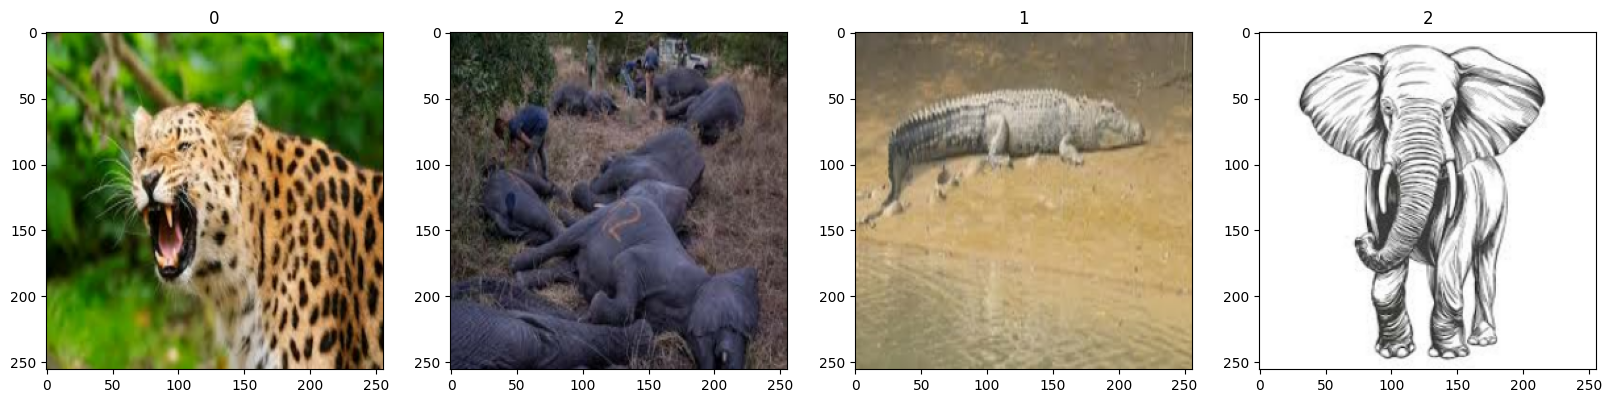

In [16]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [17]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255
    return image, label


data=data.map(lambda image, label : normalize(image, label))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [25]:
dataset_size = len(list(data))
print(f"Size of dataset : {dataset_size}")
train_size = int(0.7 * dataset_size)
print(f"Size of train : {train_size}")
val_size = int(0.15 * dataset_size)
print(f"Size of val : {val_size}")
test_size = dataset_size - train_size - val_size
print(f"Size of test : {test_size}")

Size of dataset : 42
Size of train : 29
Size of val : 6
Size of test : 7


In [26]:
train_data = data.take(train_size)
remaining_data = data.skip(train_size)
val_data = remaining_data.take(val_size)
test_data = remaining_data.skip(val_size)

In [36]:
print(list(train_data)[28][0][0].shape)

(256, 256, 3)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [38]:
model = models.Sequential([
    layers.InputLayer(input_shape=(256, 256, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

**Q.6** Compile your model

In [39]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [40]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
29/29 [==============================] - 66s 2s/step - loss: 1.7294 - accuracy: 0.3373 - val_loss: 1.3098 - val_accuracy: 0.4219
Epoch 2/15
29/29 [==============================] - 59s 2s/step - loss: 1.2491 - accuracy: 0.4203 - val_loss: 1.1997 - val_accuracy: 0.4844
Epoch 3/15
29/29 [==============================] - 80s 3s/step - loss: 1.0460 - accuracy: 0.5614 - val_loss: 0.9166 - val_accuracy: 0.6979
Epoch 4/15
29/29 [==============================] - 81s 3s/step - loss: 0.7990 - accuracy: 0.7004 - val_loss: 0.7721 - val_accuracy: 0.6510
Epoch 5/15
29/29 [==============================] - 63s 2s/step - loss: 0.6018 - accuracy: 0.7694 - val_loss: 0.7484 - val_accuracy: 0.7135
Epoch 6/15
29/29 [==============================] - 73s 2s/step - loss: 0.4060 - accuracy: 0.8534 - val_loss: 0.6211 - val_accuracy: 0.8073
Epoch 7/15
29/29 [==============================] - 56s 2s/step - loss: 0.2368 - accuracy: 0.9224 - val_loss: 0.5856 - val_accuracy: 0.8594
Epoch 8/15
29/29 [==

**Q.8** Test your code with test set

In [41]:
loss,accuracy=model.evaluate(test_data)

7/7 [==============================] - 9s 377ms/step - loss: 0.7570 - accuracy: 0.8696


In [42]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.8695651888847351


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**